In [49]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import cvxpy as cp
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

### Data load

In [50]:
# df_ori = pd.read_csv('./data/adjclose_10.csv', sep=',')
# df_ori['cash'] = 1
# df_ori = pd.read_csv('./data/adjclose_100.csv', sep=',')
# df_ori=pd.read_csv('./data/chinastocksresult.csv')
# df=pd.read_csv('./data/NYSE-n.csv')
# df=pd.read_csv('./data/NYSE-n.csv')
# df_ori = pd.read_csv('./data/adjclose_200.csv', sep=',')
df_ori = pd.read_csv('./data/adjclose_390.csv', sep=',')
# df

In [51]:
df_ori.set_index('Date', inplace=True)
df_ori = df_ori.dropna(axis=1)
df_ori.index = pd.DatetimeIndex(df_ori.index)
# ENDTIME = pd.to_datetime('2008-12-31')
# df_ori = df_ori.loc[df_ori.index <= ENDTIME]
df_ori.tail()

,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-22,123.989998,191.309998,102.699997,85.949997,333.130005,619.719971,182.669998,74.330002,231.149994,202.660004,...,244.470001,31.990000,87.529999,60.430000,104.010002,31.360001,128.332977,113.830002,225.860001,34.410000
2023-11-24,126.620003,189.970001,102.870003,86.599998,334.040009,619.429993,183.050003,74.300003,230.660004,203.419998,...,244.279999,31.940001,88.309998,60.520000,104.570000,31.320000,127.904991,113.430000,228.919998,34.349998
2023-11-27,125.010002,189.789993,102.709999,87.000000,332.429993,619.270020,183.770004,73.190002,229.160004,202.259995,...,245.039993,31.620001,87.059998,60.450001,103.959999,31.480000,127.690002,113.839996,231.500000,34.400002
2023-11-28,124.709999,190.399994,102.059998,84.449997,332.559998,623.320007,183.199997,74.050003,228.990005,207.369995,...,241.669998,31.540001,84.940002,60.970001,103.900002,31.480000,126.389999,113.089996,233.889999,34.549999
2023-11-29,127.589996,189.369995,103.629997,82.379997,333.339996,617.390015,182.710007,73.190002,229.160004,213.850006,...,240.770004,31.700001,83.669998,60.000000,102.339996,31.330000,125.519997,113.919998,236.619995,35.439999


100%|██████████| 390/390 [00:00<00:00, 2042.20it/s]


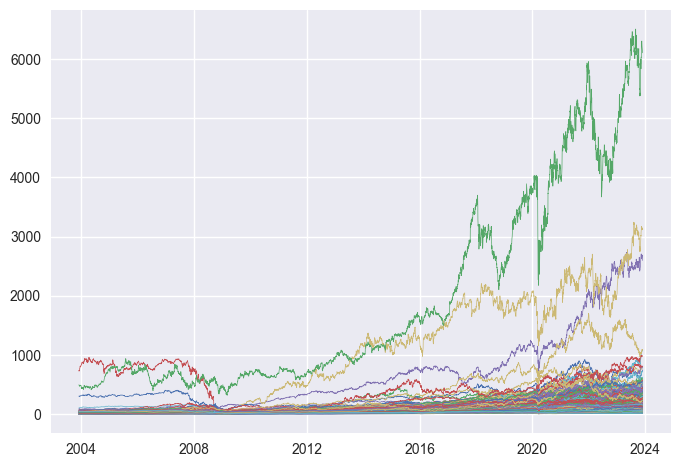

In [52]:
plt.figure()
for stk in tqdm(df_ori.columns):
    plt.plot(df_ori.index, df_ori.loc[:,stk], linewidth=0.5, label=stk)
    # plt.legend(loc='best')
# plt.plot(df_ori.index, df_ori.iloc[:,232], linewidth=0.5, label='MNST')
#plt.savefig('./result/data_part/390_stocks_performance.png',bbox_inches='tight')
plt.show()

In [53]:
# df=df-1#use nyse dataset
df = df_ori.pct_change().iloc[1:,:]
# df['cash']=(1.1)**(1/252)-1
df.head()

,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-02,-0.016973,-0.007831,0.006001,0.021832,0.012234,-0.020907,-0.007631,0.012031,0.002569,0.019313,...,0.007833,0.005419,0.003240,0.009529,0.003023,-0.001527,-0.003701,-0.002065,-0.007874,-0.000804
2003-12-03,0.017985,-0.023676,0.000442,-0.001303,0.012865,0.010920,-0.012545,0.009092,-0.014860,0.015579,...,-0.013453,0.006569,0.049657,0.003540,0.001096,0.002402,-0.002285,-0.002365,-0.001905,-0.003223
2003-12-04,-0.010954,0.005706,0.001546,-0.006001,-0.014627,-0.000240,-0.005123,0.015246,0.010663,-0.002902,...,0.000303,-0.006526,-0.005769,0.002940,0.013136,-0.007841,-0.004010,-0.020000,0.001590,-0.001131
2003-12-05,-0.038228,-0.014187,-0.008600,0.002625,-0.010547,-0.066026,-0.028630,-0.003413,0.000000,-0.021622,...,-0.004848,-0.015496,-0.009284,-0.009379,-0.006483,-0.014270,-0.025014,-0.005594,-0.022070,-0.009709
2003-12-08,0.020060,0.009594,0.007785,0.022513,-0.011054,0.013625,-0.011874,0.015753,-0.004374,-0.001275,...,0.001522,0.031138,-0.003124,0.013018,0.016858,0.013140,0.029785,0.017179,0.040753,0.011601


In [54]:
df = df.dropna(axis=1)
df.isnull().sum().sum()

0

In [55]:
df.head()

,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2003-12-02,-0.016973,-0.007831,0.006001,0.021832,0.012234,-0.020907,-0.007631,0.012031,0.002569,0.019313,...,0.007833,0.005419,0.003240,0.009529,0.003023,-0.001527,-0.003701,-0.002065,-0.007874,-0.000804
2003-12-03,0.017985,-0.023676,0.000442,-0.001303,0.012865,0.010920,-0.012545,0.009092,-0.014860,0.015579,...,-0.013453,0.006569,0.049657,0.003540,0.001096,0.002402,-0.002285,-0.002365,-0.001905,-0.003223
2003-12-04,-0.010954,0.005706,0.001546,-0.006001,-0.014627,-0.000240,-0.005123,0.015246,0.010663,-0.002902,...,0.000303,-0.006526,-0.005769,0.002940,0.013136,-0.007841,-0.004010,-0.020000,0.001590,-0.001131
2003-12-05,-0.038228,-0.014187,-0.008600,0.002625,-0.010547,-0.066026,-0.028630,-0.003413,0.000000,-0.021622,...,-0.004848,-0.015496,-0.009284,-0.009379,-0.006483,-0.014270,-0.025014,-0.005594,-0.022070,-0.009709
2003-12-08,0.020060,0.009594,0.007785,0.022513,-0.011054,0.013625,-0.011874,0.015753,-0.004374,-0.001275,...,0.001522,0.031138,-0.003124,0.013018,0.016858,0.013140,0.029785,0.017179,0.040753,0.011601


### equally weighted

In [56]:
def equally_weighted(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1 / len(df.columns)] * len(df.columns))
    ret_EW=[]
    # print(cur_stg)

    for i in range(len(df)):
        cur_ret_EW=np.dot(cur_stg, 1 + df.iloc[i,:].values)
        cur_pfl = cur_pfl * cur_ret_EW
        arr_pfl.append(cur_pfl)
        ret_EW.append(cur_ret_EW)

    return arr_pfl,ret_EW

arr_equal, ret_EW= equally_weighted(df)

### BCRP

In [57]:
#Best constant rebalanced portfolio in hindsight
def BCRP(df):
    x=cp.Variable(len(df.columns),nonneg=True)
    objective=cp.Maximize(cp.sum(cp.log(1+df.values@x)))
    constrains=[cp.sum(x)<=1]
    problem=cp.Problem(objective,constrains)
    result=problem.solve(solver=cp.ECOS)
    weight=x.value
    arr_pfl = [1]
    cur_pfl = 1
    for i in range(len(df)):
        cur_pfl = cur_pfl * np.dot(weight, 1 + df.iloc[i,:].values)
        arr_pfl.append(cur_pfl)
    return weight,arr_pfl
weight_BCRP,arr_BCRP=BCRP(df)
# weight_BCRP

In [ ]:
plt.figure()
# plt.plot(df.index, arr_pfl[:-1], linewidth=0.5, label='OGD')
plt.plot(df.index, arr_equal[:-1], linewidth=1, label='equal')
plt.plot(df.index,arr_BCRP[:-1], linewidth=1, label='BCRP')
#plt.savefig('./result/data_part/BCRP_ performance_390.png',bbox_inches='tight')
plt.legend(loc='best')
plt.show()

### loss function

In [58]:
df_num=df.values

In [59]:
def minstrategy_regret(df_num):
    x=cp.Variable(df_num.shape[1],nonneg=True)
    objective=cp.Minimize(cp.sum(-1*cp.log(1+df_num)@x))
    constrains=[cp.sum(x)==1]
    prob=cp.Problem(objective,constrains)
    result=prob.solve(solver=cp.ECOS)
    return objective.value
xmin=minstrategy_regret(df_num[0:10])
xmin

-0.2457387371315381

In [60]:
def minstrategy_regret_x(df_num):
    x=cp.Variable(df_num.shape[1],nonneg=True)
    objective=cp.Minimize(cp.sum(-1*cp.log(1+df_num)@x))
    constrains=[cp.sum(x)==1]
    prob=cp.Problem(objective,constrains)
    result=prob.solve(solver=cp.ECOS)
    return x.value
#xmin=minstrategy_regret_x(df_num)

In [61]:
minstrategy_re=[]
for i in tqdm(range(df_num.shape[0])):
    x=minstrategy_regret(df_num[:i+1,:])
    minstrategy_re.append(x)

    

100%|██████████| 5033/5033 [06:24<00:00, 13.07it/s]


$$
\text{Regret}=\sum_{\tau=1}^{T}\langle g,x_{\tau}\rangle-\min_{x \in X}\sum_{\tau=1}^{T}\langle g,x\rangle
$$

$$
\text{loss}=-\ln(1+return_{t-1}\mathbf{x})
$$
$$
\text{gradient}=-\ln (1+return_{t-1})
$$

### OGD

In [62]:
# begin OGD process
# import math

def OGD_update(x_old, ETA, loss, num_of_var):
    x = cp.Variable(num_of_var, nonneg=True)
    # x = cp.Variable(num_of_var, nonneg=False)
    # objective = cp.Minimize(ETA * np.array(loss) @ x + 0.5 * cp.sum((x - x_old) ** 2))
    objective = cp.Minimize(cp.norm(x_old-ETA*loss-x,2))
    constraints = [cp.sum(x) == 1]
    prob = cp.Problem(objective, constraints)
    result = prob.solve(solver='SCS')

    return x.value

def OGD_algo(df_num):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/df_num.shape[1]] * df_num.shape[1])
    last_stg = np.array([1/df_num.shape[1]] * df_num.shape[1])
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1
    # regret=0

    for i in tqdm(range(len(df_num))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
       
       
        ETA=0.08

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (np.log(df_num[i,:]+1))
        regre=regre+(direction@cur_stg)
        # regremin=minstrategy_regret(df_num[:i+1,:])
        regret=regre-minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        cur_stg = OGD_update(cur_stg, ETA, direction, df_num.shape[1])
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight,acu_regret,avg_regret

arr_pfl_OGD , arr_stg_OGD , ret_OGD, weight_OGD,acu_regret_OGD,avg_regret_OGD= OGD_algo(df_num)

100%|██████████| 5033/5033 [00:41<00:00, 122.71it/s]


In [ ]:
plt.figure()
plt.plot(avg_regret_OGD[:1000], linewidth=1, label='average regret of OGD')
plt.legend(loc='best')
#plt.savefig('./result/OGD_part/OGDloss_for_390_stocks.png',bbox_inches='tight') 
plt.title('Average Regret of OGD for 390 stocks')
plt.show()

In [ ]:
plt.figure()
plt.plot(acu_regret_OGD[:1000], linewidth=1, label='regret of OGD')
plt.legend(loc='best')
#plt.savefig('./result/OGD_part/OGDregret_for_390 stocks.png',bbox_inches='tight') 
plt.title('OGD regret')
plt.show()

### Examine the effect of the number of the stocks 

In [ ]:
# arr_exam = []

# for num in tqdm(range(100,390,10)):
#     idx = np.random.choice(390, size=num, replace=False)
#     df_exam = df.iloc[:,:num]
#     df_exam = np.array(df_exam)
#     # print(type(df_exam))
#     arr_pfl_OGD , arr_stg_OGD , ret_OGD, weight_OGD , acu_regret_OGD , avg_regret_OGD = OGD_algo(df_exam)
#     arr_exam.append(arr_pfl_OGD[-1])

# arr_exam

In [ ]:
# plt.figure()

# plt.plot([i for i in range(100,390,10)], arr_exam)
# plt.xlabel('Number of stocks')
# plt.ylabel('Total return')
# plt.title('Effect of the number of the stocks on total return')

# plt.show()

In [ ]:
# arr_exam

### OMD

In [63]:
# begin OMD process
# import math

def OMD_update(x_old, loss, num_of_var, A):
    x = cp.Variable(num_of_var, nonneg=True)
    #x = cp.Variable(num_of_var)
    objective = cp.Minimize(loss @ x + 0.5 * (x.T@A@x)-(x.T@A@x_old))
    constraints = [cp.sum(x) == 1]
    prob = cp.Problem(objective, constraints)
    result = prob.solve()

    return x.value

def OMD_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1

    for i in tqdm(range(len(df))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(df_num[i,:]+1)
        # OMD to find strategy in the next round
        ETA=0.5
        a=ETA+cur_stg
        A=np.diag(a)
        last_stg = cur_stg.copy()
        regre=regre+(direction@cur_stg)
        #regremin=minstrategy_regret(df_num[:i+1,:])
        regret=regre-minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        cur_stg = OMD_update(cur_stg, direction, len(df.columns),A)
        arr_stg.append(cur_stg)
        

    return arr_pfl , arr_stg, ret, weight,avg_regret, acu_regret


arr_pfl_OMD , arr_stg_OMD , ret_OMD, weight_OMD,avg_regret_OMD,acu_regret_OMD= OMD_algo(df)

100%|██████████| 5033/5033 [00:55<00:00, 90.33it/s] 


In [ ]:
plt.figure()
plt.plot(avg_regret_OMD[:1000], linewidth=1, label='loss of OMD')
plt.legend(loc='best')
#plt.savefig('./result/OMD_for_390_stocks.png',bbox_inches='tight') 
plt.title('OMD Average Regret')
plt.show()

In [ ]:
plt.figure()
plt.plot(avg_regret_OGD[:1000], linewidth=1, label='loss of OGD')
plt.plot(avg_regret_OMD[:1000], linewidth=1, label='loss of OMD')
plt.legend(loc='best')
#plt.savefig('./result/OGDandOMD_for_390 stocks.png',bbox_inches='tight') 
plt.title('Average Regret of OGD and OMD')
plt.show()

### buy and hold

In [64]:
#buy and hold
def buy_and_hold(df_ori):
    arr_pfl = [1]
    ret=[1]
    stg = np.array([1/len(df_ori.columns)] * len(df_ori.columns))
    arr_stg=[stg]
    units=stg/df_ori.iloc[0,:].values
    for i in range(1,len(df_ori)):
        cur_pfl=df_ori.iloc[i,:].values@units
        cur_ret=cur_pfl/arr_pfl[-1]
        cur_stg=np.multiply(df_ori.iloc[i,:].values,units)/np.dot(df_ori.iloc[i,:].values,units)
        arr_pfl.append(cur_pfl)
        arr_stg.append(cur_stg)
        ret.append(cur_ret)
    return arr_pfl,arr_stg,ret[:-1]

arr_pfl_BH,arr_stg_BH,ret_BH=buy_and_hold(df)

/var/folders/4m/rxd9grt91hq7n4__bqp6nkvr0000gn/T/ipykernel_9942/2747753430.py:7: RuntimeWarning: divide by zero encountered in divide
  units=stg/df_ori.iloc[0,:].values
/var/folders/4m/rxd9grt91hq7n4__bqp6nkvr0000gn/T/ipykernel_9942/2747753430.py:9: RuntimeWarning: invalid value encountered in matmul
  cur_pfl=df_ori.iloc[i,:].values@units
/var/folders/4m/rxd9grt91hq7n4__bqp6nkvr0000gn/T/ipykernel_9942/2747753430.py:11: RuntimeWarning: invalid value encountered in multiply
  cur_stg=np.multiply(df_ori.iloc[i,:].values,units)/np.dot(df_ori.iloc[i,:].values,units)
/var/folders/4m/rxd9grt91hq7n4__bqp6nkvr0000gn/T/ipykernel_9942/2747753430.py:11: RuntimeWarning: invalid value encountered in divide
  cur_stg=np.multiply(df_ori.iloc[i,:].values,units)/np.dot(df_ori.iloc[i,:].values,units)
/var/folders/4m/rxd9grt91hq7n4__bqp6nkvr0000gn/T/ipykernel_9942/2747753430.py:10: RuntimeWarning: invalid value encountered in scalar divide
  cur_ret=cur_pfl/arr_pfl[-1]


### EG algorithm

In [65]:
# EG algorithm
def EG_update(x_old,loss,ETA):
    x=np.multiply(x_old,np.exp(-1*loss*ETA)/np.dot(x_old,np.exp(-1*loss*ETA)))
    return x
                  
def EG_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    ret=[]
    weight=[sum(cur_stg)]
    ETA=5

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(np.array(df.iloc[i,:].values)+1)
        last_stg = cur_stg.copy()
        
        cur_stg = EG_update(cur_stg, direction, ETA)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_EG , arr_stg_EG , ret_EG, weight_EG= EG_algo(df)  

100%|██████████| 5033/5033 [00:00<00:00, 11273.13it/s]


### RM algorithms

In [66]:
#RM algorithms
def RM_update(regret_old,x_old,loss):
    regret=(regret_old)+(np.dot(loss,x_old)-loss)
    x=np.maximum(regret,0)/np.sum(np.maximum(regret,0))
    return regret, x

def RM_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 1e-3
    ret=[]
    weight=[sum(cur_stg)]
    
    regret_old=0
    flag=1

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(np.array(df.iloc[i,:].values)+1)
        last_stg = cur_stg.copy()
     
        regret_old,cur_stg = RM_update(regret_old,cur_stg ,direction)

        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_RM , arr_stg_RM , ret_RM, weight_RM= RM_algo(df)  


100%|██████████| 5033/5033 [00:00<00:00, 11992.64it/s]


In [67]:
#RM+ algorithms
def RMPLUS_update(regret_old,x_old,loss):
    regret=np.maximum(regret_old+(np.dot(loss,x_old)-loss),0)
    x=regret/np.sum(regret)
    return regret, x

def RMPLUS_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 1e-3
    ret=[]
    weight=[sum(cur_stg)]
    ETA=1.2
    regret_old=0

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * np.log(np.array(df.iloc[i,:].values)+1)
        last_stg = cur_stg.copy()
        
        regret_old,cur_stg = RMPLUS_update(regret_old,cur_stg ,direction)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_RMPLUS, arr_stg_RMPLUS , ret_RMPLUS, weight_RMPLUS= RMPLUS_algo(df)  

100%|██████████| 5033/5033 [00:00<00:00, 12315.83it/s]


### market cap strategy

In [68]:
# import yfinance as yf
# def get_outstanding(df):    
#     ticker=list(df.columns)
#     outstanding=[]
#     for i in tqdm(ticker[:-1]):
#         stock=yf.Ticker(i)
#         info=stock.info
#         shares_outstanding = info.get('sharesOutstanding', 'No data')
#         outstanding.append(shares_outstanding)
#     return pd.DataFrame([outstanding],columns=ticker[:-1])
# outstanding_df=get_outstanding(df)
outstanding_df=pd.read_csv('./data/outstanding_100.csv')
outstanding=outstanding_df.values
market_cap=df_num*outstanding[:,:-1]
share=market_cap/np.sum(market_cap,axis=1)[:,np.newaxis]
arr_stg_MC=share
ret=np.sum(df_num[:-1,:]*share[:-1,:],axis=1)
ret_MC=ret+1
arr_pfl_MC=np.cumprod(1+ret)
arr_pfl_MC=np.insert(arr_pfl_MC,0,1)
arr_pfl_MC.shape

    

(5033,)

In [69]:
import yfinance as yf
def get_outstanding(df):    
    ticker=list(df.columns)
    outstanding=[]
    for i in tqdm(ticker[:-1]):
        stock=yf.Ticker(i)
        info=stock.info
        shares_outstanding = info.get('sharesOutstanding', 'No data')
        outstanding.append(shares_outstanding)
    return pd.DataFrame([outstanding],columns=ticker[:-1])
outstanding_df=get_outstanding(df)
outstanding_df.to_csv('./data/outstanding_100.csv')

100%|██████████| 389/389 [00:54<00:00,  7.13it/s]


### ONS

$regret=\sum_{1}^{T}(-\log{wr_t})-\max_{w\in W} \sum_{1}^{t}-\log{wr}$

ONS use loss function as $loss=-\log{(w*r)}$

$gradient=\frac{w}{w*r}$
$hessian=\frac{r^Tr}{(w*r)^2}$

In [ ]:
# def minstrategy_logregret(df_num):
#     try:
#         x=cp.Variable(df_num.shape[1],nonneg=True)
#         objective=cp.Minimize(cp.sum(-1*cp.log((1+df_num)@x)))
#         constrains=[cp.sum(x)==1]
#         prob=cp.Problem(objective,constrains)
#         result=prob.solve(cp.ECOS)
#     except:
#         x=cp.Variable(df_num.shape[1],nonneg=True)
#         objective=cp.Minimize(cp.sum(-1*cp.log((1+df_num)@x)))
#         constrains=[cp.sum(x)==1]
#         prob=cp.Problem(objective,constrains)
#         result=prob.solve(solver=cp.SCS)
        
#     return -objective.value
# xmin=minstrategy_logregret(df_num[0:8])
# xmin

In [ ]:
# minstrategy_logre=[]
# for i in tqdm(range(df_num.shape[0])):
#     x=minstrategy_logregret(df_num[:i+1,:])
#     minstrategy_logre.append(x)

In [70]:
def projection_ONS(q,A,num_variables):
    x=cp.Variable(num_variables,nonneg=True)
    constrains=[sum(x)==1]
    v=cp.quad_form(q-x,cp.psd_wrap(A))
    obejctive=cp.Minimize(v)
    problem=cp.Problem(obejctive,constrains)
    result=problem.solve(solver='OSQP')
    return x.value
def ONS_update(eta,delta,beta,cum_grad,cum_hessian,num_variables):
    a=np.full(num_variables,1/num_variables)
    b=(1+1/beta)*cum_grad
    I=np.eye(num_variables)
    A=cum_hessian+I
    A_inv=np.linalg.inv(A)
    q=delta*(A_inv@b)
    p=projection_ONS(q,A,num_variables)
    p=(1-eta)*p+eta*a
    return p

In [71]:
def ONS_algo(df_num):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    #calculate regret
    # regre=0
    # acu_regret=[]
    # avg_regret=[]
    cum_grad=np.zeros(len(df.columns))
    cum_hessian=np.zeros((len(df.columns),len(df.columns)))
    # T=1
    # regret=0

    for i in tqdm(range(len(df))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
        arr_pfl.append(cur_pfl)
        
        eta=0.1
        delta=0.1
        beta=1.5
        #calculate regret
        # regre=regre+np.log(cur_ret)
        # regret=minstrategy_logre[i]-regre
        # acu_regret.append(regret)
        # avg_regret.append(regret/T)
        # T+=1
        deriction=(1+df_num[i,:])/((1+df_num[i,:])@cur_stg)
        hessian=np.outer(deriction,deriction)
        cum_grad+=deriction
        cum_hessian+=hessian
        #update ONS
        last_stg = cur_stg.copy()
        cur_stg = ONS_update(eta,delta,beta,cum_grad,cum_hessian,len(df.columns))
        arr_stg.append(cur_stg)
    return arr_pfl , arr_stg, ret, weight #,acu_regret,avg_regret
        
arr_pfl_ONS , arr_stg_ONS , ret_ONS, weight_ONS= ONS_algo(df_num)   # ,acu_regret_ONS,avg_regret_ONS    

100%|██████████| 5033/5033 [23:48<00:00,  3.52it/s]


In [ ]:
plt.figure()
plt.plot(avg_regret_ONS[:1000], linewidth=1, label='average regret of OGD')
plt.legend(loc='best')
#plt.savefig('./result/OGD_part/OGDloss_for_390_stocks.png',bbox_inches='tight') 
plt.title('ONS for 390 stocks')
plt.show()
plt.figure()
plt.plot(acu_regret_ONS[:1000], linewidth=1, label='regret of OGD')
plt.legend(loc='best')
#plt.savefig('./result/OGD_part/OGDregret_for_390 stocks.png',bbox_inches='tight') 
plt.title('ONS regret')
plt.show()

### up

In [72]:

#Donot use up, It need lots of time 

#universal portfolio(up)
def binnings(n, k, cache={}):
    if n == 0:
        return np.zeros((1, k))
    if k == 0:
        return np.empty((0, 0))
    args = (n, k)
    if args in cache:
        return cache[args]
    a = binnings(n - 1, k, cache)
    a1 = a + (np.arange(k) == 0)
    b = binnings(n, k - 1, cache)
    b1 = np.hstack((np.zeros((b.shape[0], 1)), b))
    result = np.vstack((a1, b1))
    cache[args] = result
    return result

def portfolio_wealth(b, stock_data):
    return np.prod(np.dot(stock_data,b))

def up_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    ret=[]
    weight=[sum(cur_stg)]
    #calculate regret
    # regre=0
    # acu_regret=[]
    # avg_regret=[]
    # T=1
    allocation_granularity = 1
    all_portfolio_allocations = binnings(allocation_granularity, len(df.columns))
    row_sums = all_portfolio_allocations.sum(axis=1)
    all_portfolios = all_portfolio_allocations / row_sums[:,np.newaxis]
    for i in tqdm(range(len(df))):
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
        arr_pfl.append(cur_pfl)
        last_stg = cur_stg.copy()
        #calculate regret
        # regre=regre+np.log(cur_ret)
        # regret=minstrategy_logre[i]-regre
        # acu_regret.append(regret)
        # avg_regret.append(regret/T)
        #update
        portfolio_weights = np.array([portfolio_wealth(x, 1+df_num[:i,:]) for x in list(all_portfolios)])
        weighted_portfolio = np.dot(portfolio_weights, all_portfolios)
        cur_stg = weighted_portfolio / np.sum(portfolio_weights)

        arr_stg.append(cur_stg)
    return arr_pfl , arr_stg, ret, weight

        
arr_pfl_up , arr_stg_up , ret_up, weight_up= up_algo(df)     

100%|██████████| 5033/5033 [1:02:33<00:00,  1.34it/s]


### SGP
SGP-1 is OGD with loss function of $\log(w*(1+r))$

SGP-2 add regular term

In [73]:
def SGP_update(x_old, ETA, g, num_of_var):
    x = cp.Variable(num_of_var, nonneg=True)
    objective = cp.Minimize(cp.norm(x_old-ETA*g-x,2))
    constraints = [cp.sum(x) == 1]
    prob = cp.Problem(objective, constraints)
    result = prob.solve(solver='SCS')

    return x.value

def SGP_algo(df_num):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    #calculate regret
    # regre=0
    # acu_regret=[]
    # avg_regret=[]
    # T=1
    # regret=0

    for i in tqdm(range(len(df))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
       
       
        ETA=0.08

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (df_num[i,:]+1)/np.dot(cur_stg,df_num[i,:]+1)
        #calculate regret
        # regre=regre+np.log(cur_ret)
        # regret=minstrategy_logre[i]-regre
        # acu_regret.append(regret)
        # avg_regret.append(regret/T)
        # T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        cur_stg = OGD_update(cur_stg, ETA, direction, len(df.columns))
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight#,acu_regret,avg_regret

arr_pfl_SGP , arr_stg_SGP , ret_SGP, weight_SGP= SGP_algo(df_num)#,acu_regretSGP,avg_regret_SGP

100%|██████████| 5033/5033 [00:20<00:00, 247.92it/s]


In [74]:
def SGP2_algo(df_num):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    #calculate regret
    # regre=0
    # acu_regret=[]
    # avg_regret=[]
    # T=1
    # regret=0

    for i in tqdm(range(len(df))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + df_num[i,:])
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
       
        lam=0.2
        ETA=1/lam
        
        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = (lam*cur_stg)-1 * (df_num[i,:]+1)/np.dot(cur_stg,df_num[i,:]+1)
        #calculate regret
        # regre=regre+np.log(cur_ret)
        # regret=minstrategy_logre[i]-regre
        # acu_regret.append(regret)
        # avg_regret.append(regret/T)
        # T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        cur_stg = OGD_update(cur_stg, ETA, direction, len(df.columns))
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight#,acu_regret,avg_regret

arr_pfl_SGP2 , arr_stg_SGP2 , ret_SGP2, weight_SGP2= SGP2_algo(df_num)#,acu_regretSGP2,avg_regret_SGP2

100%|██████████| 5033/5033 [00:23<00:00, 212.73it/s]


### RM (log)

In [75]:
#RM algorithms
def RM_update(regret_old,x_old,loss):
    regret=(regret_old)+(np.dot(loss,x_old)-loss)
    x=np.maximum(regret,0)/np.sum(np.maximum(regret,0))
    return regret, x

def RMlog_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    ret=[]
    weight=[sum(cur_stg)]
    
    regret_old=0
    flag=1

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (df_num[i,:]+1)/np.dot(cur_stg,df_num[i,:]+1)
        last_stg = cur_stg.copy()
     
        regret_old,cur_stg = RM_update(regret_old,cur_stg ,direction)

        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_RMlog , arr_stg_RMlog , ret_RMlog, weight_RMlog= RMlog_algo(df)  


100%|██████████| 5033/5033 [00:00<00:00, 15148.27it/s]


In [76]:
#RM+ algorithms
def RMPLUS_update(regret_old,x_old,loss):
    regret=np.maximum(regret_old+(np.dot(loss,x_old)-loss),0)
    x=regret/np.sum(regret)
    return regret, x

def RMPLUSlog_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 1e-3
    ret=[]
    weight=[sum(cur_stg)]
    ETA=1.2
    regret_old=0

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (df_num[i,:]+1)/np.dot(cur_stg,df_num[i,:]+1)
        last_stg = cur_stg.copy()
        
        regret_old,cur_stg = RMPLUS_update(regret_old,cur_stg ,direction)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_RMPLUSlog, arr_stg_RMPLUSlog , ret_RMPLUSlog, weight_RMPLUSlog= RMPLUSlog_algo(df)  

100%|██████████| 5033/5033 [00:00<00:00, 13461.72it/s]


### EG log

In [77]:
# EG algorithm
def EG_update(x_old,loss,ETA):
    x=np.multiply(x_old,np.exp(-1*loss*ETA)/np.dot(x_old,np.exp(-1*loss*ETA)))
    return x
                  
def EGlog_algo(df):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/len(df.columns)] * len(df.columns))
    last_stg = np.array([1/len(df.columns)] * len(df.columns))
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    ret=[]
    weight=[sum(cur_stg)]
    ETA=5

    for i in tqdm(range(len(df))):
        # return of today
       
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_pfl = cur_pfl * (np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        ret.append(np.dot(cur_stg, 1 + df.iloc[i,:].values) - commision_rate)
        weight.append(np.sum(cur_stg))

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction =  -1 * (df_num[i,:]+1)/np.dot(cur_stg,df_num[i,:]+1)
        last_stg = cur_stg.copy()
        
        cur_stg = EG_update(cur_stg, direction, ETA)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight
arr_pfl_EGlog , arr_stg_EGlog , ret_EGlog, weight_EGlog= EGlog_algo(df)  

100%|██████████| 5033/5033 [00:00<00:00, 14361.57it/s]


### Meta OGD

In [ ]:
# algo_name=['euqally_weight','OGD',"OMD",'buyandhold','EG','RM','RM+','market_cap']
# algos_ret=(np.array([ret_EW,ret_OGD,ret_OMD,ret_BH,ret_EG,ret_RM,ret_RMPLUS,ret_MC]).T)-1
# algos_ret=(np.array([ret_OMD,ret_EG,ret_OGD,ret_BH]).T)-1
# algo_name=['OGD',"OMD",'EG','RM','RM+']
# algos_ret=(np.array([ret_OGD,ret_OMD,ret_EG,ret_RM,ret_RMPLUS]).T)-1


In [78]:
algo_name=['OGD','OMD','EG','RM','RM+','EGlog','RMlog','RMpluslog','ONS','SPG1','SPG2']
algos_ret=(np.array([ret_OGD,ret_OMD,ret_EG,ret_RM,ret_RMPLUS,ret_EGlog,ret_RMlog,ret_RMPLUSlog,ret_ONS,ret_SGP,ret_SGP2]).T)-1

In [79]:
algos_minstrategy_re=[]
for i in tqdm(range(algos_ret.shape[0])):
    x=minstrategy_regret(algos_ret[:i+1,:])
    algos_minstrategy_re.append(x)
# algos_minstrategy_re

100%|██████████| 5033/5033 [00:28<00:00, 176.02it/s]


In [80]:
def MetaOGD_algo(algos_ret):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/algos_ret.shape[1]] * algos_ret.shape[1])
    last_stg = np.array([1/algos_ret.shape[1]] * algos_ret.shape[1])
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1
    # regret=0

    for i in tqdm(range(len(algos_ret))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + algos_ret[i,:])+(1-np.sum(cur_stg))
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
        
        
        ETA=0.5

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (algos_ret[i,:]+1)/np.dot(cur_stg,algos_ret[i,:]+1) #-1 * (np.log(algos_ret[i,:]+1))
        regre=regre+(direction@cur_stg)
        # regremin=minstrategy_regret(algos_ret[:i+1,:])
        regret=regre-algos_minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        cur_stg = OGD_update(cur_stg, ETA, direction, algos_ret.shape[1])
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight,acu_regret,avg_regret

arr_pfl_NOGD , arr_stg_NOGD , ret_NOGD, weight_NOGD,acu_regret_NOGD,avg_regret_NOGD= MetaOGD_algo(algos_ret)
# arr_pfl_NOGD , arr_stg_NOGD , ret_NOGD, weight_NOGD= NestedOGD_algo(algos_ret)

100%|██████████| 5033/5033 [00:12<00:00, 396.07it/s]


### meta EG(OGU)

In [81]:
def MetaEG_algo(algos_ret):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/algos_ret.shape[1]] * algos_ret.shape[1])
    last_stg = np.array([1/algos_ret.shape[1]] * algos_ret.shape[1])
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1
    ETA=2
    # regret=0

    for i in tqdm(range(len(algos_ret))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + algos_ret[i,:])+(1-np.sum(cur_stg))
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
        
        

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction = -1 * (algos_ret[i,:]+1)/np.dot(cur_stg,algos_ret[i,:]+1)# -1 * (np.log(algos_ret[i,:]+1))
        regre=regre+(direction@cur_stg)
        # regremin=minstrategy_regret(algos_ret[:i+1,:])
        regret=regre-algos_minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        cur_stg = EG_update(cur_stg, direction, ETA)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight,acu_regret,avg_regret

arr_pfl_NEG , arr_stg_NEG , ret_NEG, weight_NEG,acu_regret_NEG,avg_regret_NEG= MetaEG_algo(algos_ret)


100%|██████████| 5033/5033 [00:00<00:00, 55583.76it/s]


### meta RM 

In [82]:
def MetaRMPLUS_algo(algos_ret):
    arr_pfl = [1]
    cur_pfl = 1
    cur_stg = np.array([1/algos_ret.shape[1]] * algos_ret.shape[1])
    last_stg = np.array([1/algos_ret.shape[1]] * algos_ret.shape[1])
    # cur_stg = np.array([0] * len(df.columns))
    # last_stg = np.array([0] * len(df.columns))
    arr_stg = [cur_stg]
    COMMISSION = 0
    # RSKFREE = 1.02 ** (1/365)
    ret=[]
    weight=[sum(cur_stg)]
    regre=0
    acu_regret=[]
    avg_regret=[]
    T=1
    regret_old=0

    for i in tqdm(range(len(algos_ret))):
        # return of today
        commision_rate = np.sum(np.abs(cur_stg - last_stg)) * COMMISSION
        cur_ret=np.dot(cur_stg, 1 + algos_ret[i,:])+(1-np.sum(cur_stg))
        cur_pfl = cur_pfl * (cur_ret - commision_rate)
        ret.append(cur_ret)
        weight.append(np.sum(cur_stg))
        
        

        arr_pfl.append(cur_pfl)
        # define the loss: linear -retn * x
        # direction = -1 * df.iloc[i,:].values
        direction =  -1 * (np.log(algos_ret[i,:]+1))
        regre=regre+(direction@cur_stg)
        # regremin=minstrategy_regret(algos_ret[:i+1,:])
        regret=regre-algos_minstrategy_re[i]
        # regret=regret+np.dot(direction,cur_stg)-np.dot(direction,xmin)
        acu_regret.append(regret)
        avg_regret.append(regret/T)
        T+=1
        # OGD to find strategy in the next round
        last_stg = cur_stg.copy()
        regret_old,cur_stg = RMPLUS_update(regret_old,cur_stg ,direction)
        arr_stg.append(cur_stg)

    return arr_pfl , arr_stg, ret, weight,acu_regret,avg_regret

arr_pfl_NRMP , arr_stg_NRMP , ret_NRMP, weight_NRMP,acu_regret_NRMP,avg_regret_NRMP= MetaRMPLUS_algo(algos_ret)


100%|██████████| 5033/5033 [00:00<00:00, 52264.86it/s]


In [ ]:
arr_stg = pd.DataFrame( arr_stg_NRMP[1:], columns=algo_name)

plt.figure()
for stk in arr_stg.columns:
    plt.plot(df.index,arr_stg.loc[:,stk], linewidth=1,label=stk)
    #plt.legend(loc='best')

#plt.plot(df.index, arr_stg.loc[:,'cash'], linewidth=1, label=stk)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Weight')
#plt.title('Weight For Each algo expert')
plt.savefig('./result/meta_algoritms/MRMP_Weight_For_Each_algo_expertfor_100 stocks.png',bbox_inches='tight') 
plt.show()

In [ ]:
plt.figure()
plt.plot(avg_regret_OMD[:1000], linewidth=1, label='average regret of NOMD')
plt.legend(loc='best')

plt.title('NOGD average regret')
plt.savefig('./result/algos_part/NOMD_avgregretfor_390_stocks.png',bbox_inches='tight') 
plt.show()

In [ ]:
plt.figure()
plt.plot(acu_regret_OMD[:1000], linewidth=1, label='regret of NOMD')
plt.legend(loc='best')

plt.title('NOGD regret')
plt.savefig('./result/algos_part/NOMD_regretfor_390 stocks.png',bbox_inches='tight') 
plt.show()

### Graph

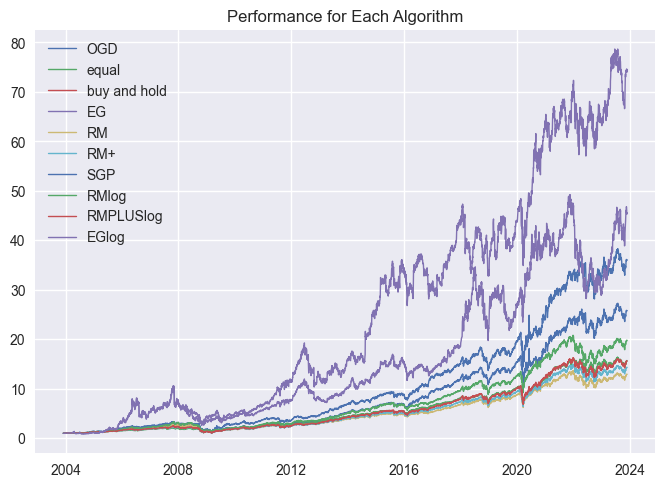

In [102]:
plt.figure()
plt.plot(df.index, arr_pfl_OGD[:-1], linewidth=1, label='OGD')
# plt.plot(df.index, arr_pfl_OMD[:-1], linewidth=1, label='OMD')
# # plt.plot(df.index, arr_BCRP[1:], linewidth=1, label='BCRP')
plt.plot(df.index,arr_equal[:-1], linewidth=1, label='equal')
# plt.plot(df.index, arr_pfl_up[:-1], linewidth=1, label='up')
plt.plot(df.index, arr_pfl_BH, linewidth=1, label='buy and hold')
plt.plot(df.index, arr_pfl_EG[:-1], linewidth=1, label='EG')
plt.plot(df.index,arr_pfl_RM[:-1], linewidth=1, label='RM')
plt.plot(df.index,arr_pfl_RMPLUS[:-1], linewidth=1, label='RM+')
# plt.plot(df.index,arr_pfl_MC[:-1], linewidth=1, label='market cap')
# plt.plot(df.index,arr_pfl_NOGD[:-1], linewidth=1, label='Meta OGD')
# plt.plot(df.index,arr_pfl_ONS[:-1], linewidth=1, label='ONS')
plt.plot(df.index,arr_pfl_SGP[:-1], linewidth=1, label='SGP')
# plt.plot(df.index,arr_pfl_SGP2[:-1], linewidth=1, label='SGP2')
plt.plot(df.index,arr_pfl_RMlog[:-1], linewidth=1, label='RMlog')
plt.plot(df.index,arr_pfl_RMPLUSlog[:-1], linewidth=1, label='RMPLUSlog')
plt.plot(df.index,arr_pfl_EGlog[:-1], linewidth=1, label='EGlog')
# plt.plot(df.index,arr_pfl_NEG[:-1], linewidth=1, label='Meta EG')
# plt.plot(df.index,arr_pfl_NRMP[:-1], linewidth=1, label='Meta RMP')

plt.legend(loc='best')
#plt.savefig('./result/OGD_part/OGD_perfo_390stocks.png',bbox_inches='tight') 
plt.title('Performance for Each Algorithm')
# plt.savefig('./result/discussion/all_algo_perfo_390stocks.png',bbox_inches='tight') 
# plt.savefig('./result/log_and_linear/100stocks_logLin_OGD.png',bbox_inches='tight')
# plt.savefig('./result/log_and_linear/100stocks_logLin_RM.png',bbox_inches='tight') 
plt.show()

In [ ]:
plt.figure()
plt.plot(ret_ONS[1:], linewidth=1, label='OGD')
plt.show()

In [ ]:
arr_stg = pd.DataFrame( arr_stg_SGP2[1:], columns=df.columns)

plt.figure()
for stk in arr_stg.columns:
    plt.plot(df.index,arr_stg.loc[:,stk], linewidth=1)#label=stk)
    #plt.legend(loc='best')

#plt.plot(df.index, arr_stg.loc[:,'cash'], linewidth=1, label=stk)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Weight')
plt.title('Weight For Each Stock')
#plt.savefig(f'result/OGD_part/390stocks_all_weight.png',bbox_inches='tight')
plt.show()

In [ ]:
plt.figure()
plt.plot(df.index, arr_stg.loc[:,'cash'], linewidth=1, label=stk)
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Weight')
plt.title('Weight For cash')
#plt.savefig(f'result\OGD_part/390stocks_cash_weight.png',bbox_inches='tight')
plt.show()

### Evaluate

In [ ]:
# all_algo_name=['euqally_weight','OGD',"OMD",'buyandhold','EG','RM','RM+','market_cap','nested_OGD']
# algos_arr_pfl=np.array([arr_equal,arr_pfl_OGD,arr_pfl_OMD,arr_pfl_BH,arr_pfl_EG,arr_pfl_RM,arr_pfl_RMPLUS,arr_pfl_MC,arr_pfl_NOGD]).T

In [87]:
all_algo_name=['OGD','EG','RM','RM+','EGlog','RMlog','RMpluslog',"Meta OGD",'meta EG','meta RMP','ons','up','SGP','SGp2']
algos_arr_pfl=np.array([arr_pfl_OGD,arr_pfl_EG,arr_pfl_RM,arr_pfl_RMPLUS,arr_pfl_EGlog,arr_pfl_RMlog,arr_pfl_RMPLUSlog,arr_pfl_NOGD
                        ,arr_pfl_NEG,arr_pfl_NRMP,arr_pfl_ONS,arr_pfl_up,arr_pfl_SGP,arr_pfl_SGP2]).T
all_algos_ret=np.array([ret_OGD,ret_EG,ret_RM,ret_RMPLUS,ret_EGlog,ret_RMlog,ret_RMPLUSlog,ret_NOGD
                        ,ret_NEG,ret_NRMP,ret_ONS,ret_up,ret_SGP,ret_SGP2]).T

In [88]:
def find_MDD(algos_arr_pfl):#max drawdown
    acumax=np.maximum.accumulate(algos_arr_pfl,axis=0)
    Mdd=(acumax-algos_arr_pfl)/acumax
    Mdd=np.max(Mdd,axis=0)
    return Mdd
    
def evaluation(algos_arr_pfl,all_algo_name,all_algos_ret):
    years=algos_arr_pfl.shape[0]/252
    df=pd.DataFrame([],index=all_algo_name)
    total_ret=algos_arr_pfl[-1,:]/algos_arr_pfl[0,:]
    df['Anual_ret']=total_ret**(1/years)-1
    risk=np.std(all_algos_ret,axis=0)/np.sqrt(years)
    df['std']=risk
    t_statistic=np.mean(all_algos_ret-1,axis=0)/(np.std(all_algos_ret,axis=0)/np.sqrt(len(all_algos_ret)))
    df['t-statistic']=t_statistic
    Mdd=find_MDD(algos_arr_pfl)
    df['MDD']=Mdd
    annual_return=(algos_arr_pfl[-1,:]**(1/years))-1
    calmar_ratio=annual_return/Mdd
    df['calmar_ratio']=calmar_ratio
    sharp_ratio=annual_return/risk
    df['sharp_ratio']=sharp_ratio
    return df

evaluation_df=evaluation(algos_arr_pfl,all_algo_name,all_algos_ret)

In [89]:
evaluation_df.sort_values(by='sharp_ratio',ascending=False)

,Anual_ret,std,t-statistic,MDD,calmar_ratio,sharp_ratio
Meta OGD,1.802817,0.005143,13.453789,0.530819,3.396290,350.530829
meta RMP,1.580914,0.004794,13.237358,0.514519,3.072606,329.771406
meta EG,1.773661,0.005453,12.655283,0.567414,3.125869,325.257669
ons,1.815706,0.006882,10.548215,0.786938,2.307305,263.846826
SGp2,1.279688,0.005798,9.861189,0.557649,2.294793,220.725978
SGP,0.196928,0.003648,3.686156,0.641141,0.307152,53.975584
up,0.148646,0.002811,3.553373,0.510794,0.291010,52.873114
RMlog,0.160959,0.003134,3.500269,0.601273,0.267697,51.363036
OGD,0.177023,0.003536,3.468821,0.679244,0.260618,50.065944
RMpluslog,0.147446,0.002988,3.376548,0.564754,0.261080,49.351744


In [90]:
def z_score(evaluation_df):
    df=evaluation_df.loc[:,['Anual_ret','std','calmar_ratio','sharp_ratio']]
    df['std']=-1*df['std']
    z=(df-df.mean(axis=0))/df.std(axis=0)
    z=z.sum(axis=1)
    df.loc[:,'z_score']=z/4
    return df
evaluation_df=z_score(evaluation_df)
evaluation_df.sort_values(by='z_score',ascending=False)    

,Anual_ret,std,calmar_ratio,sharp_ratio,z_score
Meta OGD,1.802817,-0.005143,3.396290,350.530829,1.053295
meta RMP,1.580914,-0.004794,3.072606,329.771406,0.941748
meta EG,1.773661,-0.005453,3.125869,325.257669,0.883973
ons,1.815706,-0.006882,2.307305,263.846826,0.352680
SGp2,1.279688,-0.005798,2.294793,220.725978,0.289548
up,0.148646,-0.002811,0.291010,52.873114,-0.241944
RM+,0.142449,-0.002892,0.258002,49.255248,-0.272583
RMpluslog,0.147446,-0.002988,0.261080,49.351744,-0.288076
RM,0.136540,-0.002922,0.235865,46.723902,-0.289440
RMlog,0.160959,-0.003134,0.267697,51.363036,-0.305760


In [105]:
evaluation_df.to_csv('./figure/390_z_score.csv')

In [ ]:

colors = plt.cm.viridis(np.linspace(0, 1, len(evaluation_df)))
for i in range(len(evaluation_df.columns)):
    plt.figure(figsize=(10,6))
    plt.bar(evaluation_df.index,evaluation_df.iloc[:,i],color=colors)
    plt.title(f'{evaluation_df.columns[i]}')
    plt.savefig(f'./result/discussion/evluation_390stocks{evaluation_df.columns[i]}.png',bbox_inches='tight')
    
    plt.show()